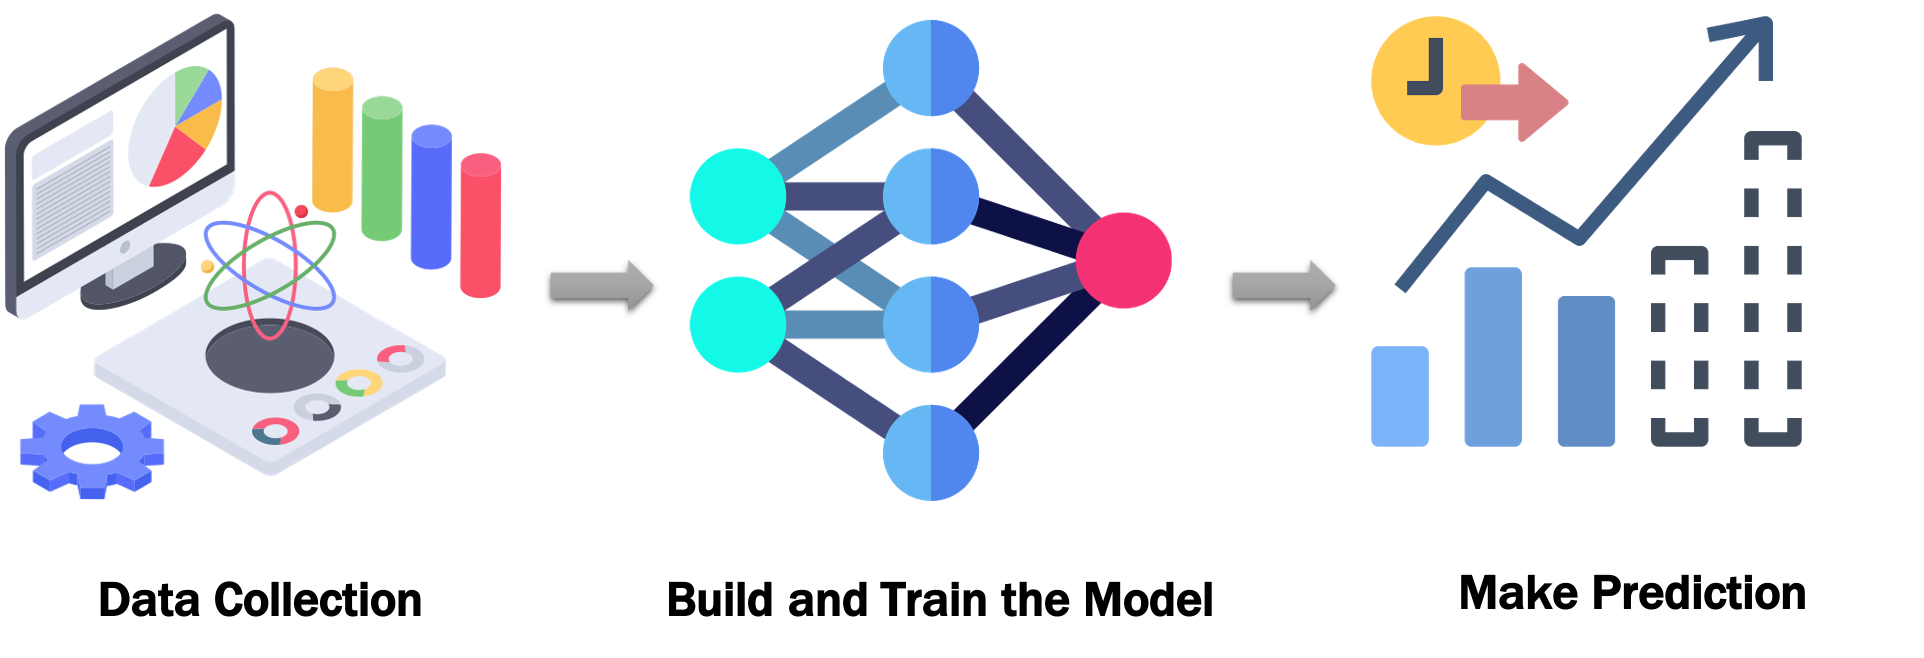

## **Analyzing the dataset**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [ ]:
dataset = load_diabetes(as_frame=True)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df = dataset.frame
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
df.age.hist()

In [ ]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns)

In [ ]:
corr.target

In [ ]:
output = df["target"]
features = df.drop(["age", "sex", "s2", "target"], axis=1)

In [ ]:
features.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.1, random_state=13)

In [ ]:
print(X_train.shape)
print(y_train.shape)

## **Build the model**

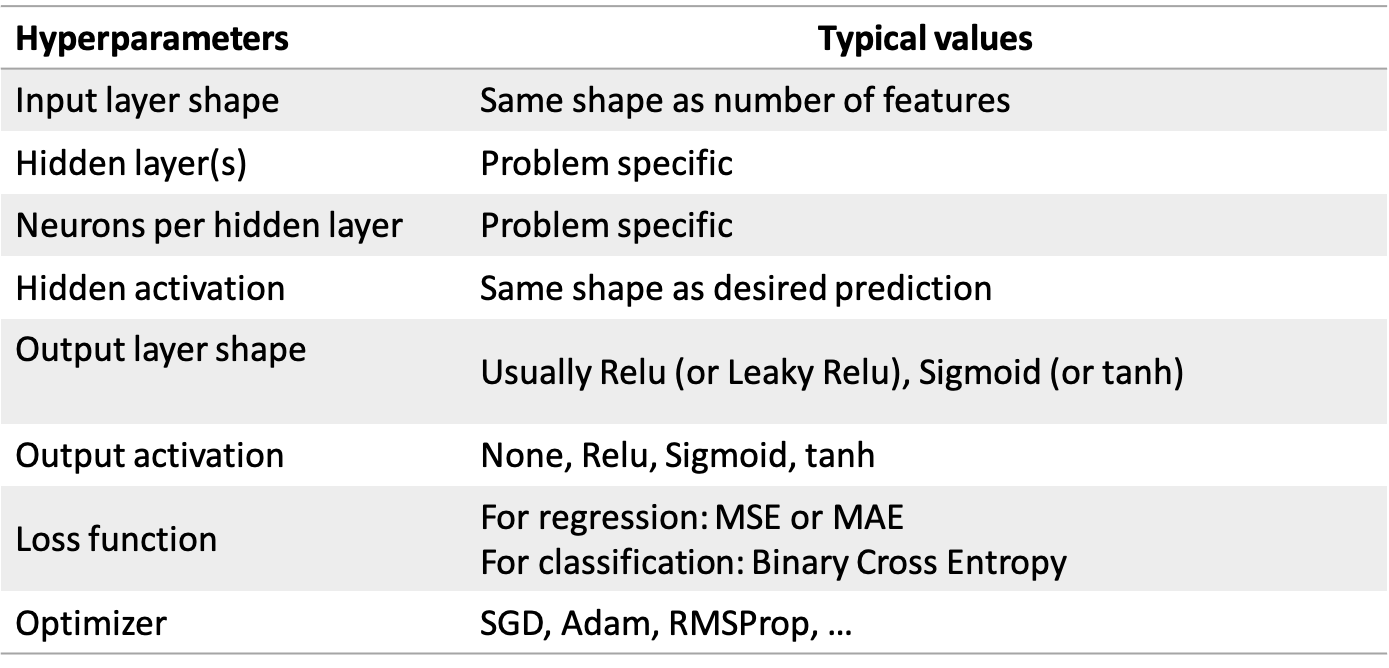

In [ ]:
# import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Sequential model

model = keras.Sequential(
    [
     keras.Input(shape=(7,)),
     layers.Dense(256, activation='relu'),
     layers.Dense(128, activation='relu'),
     layers.Dense(1),   
    ]
)

model.summary()

## Loss Optimization
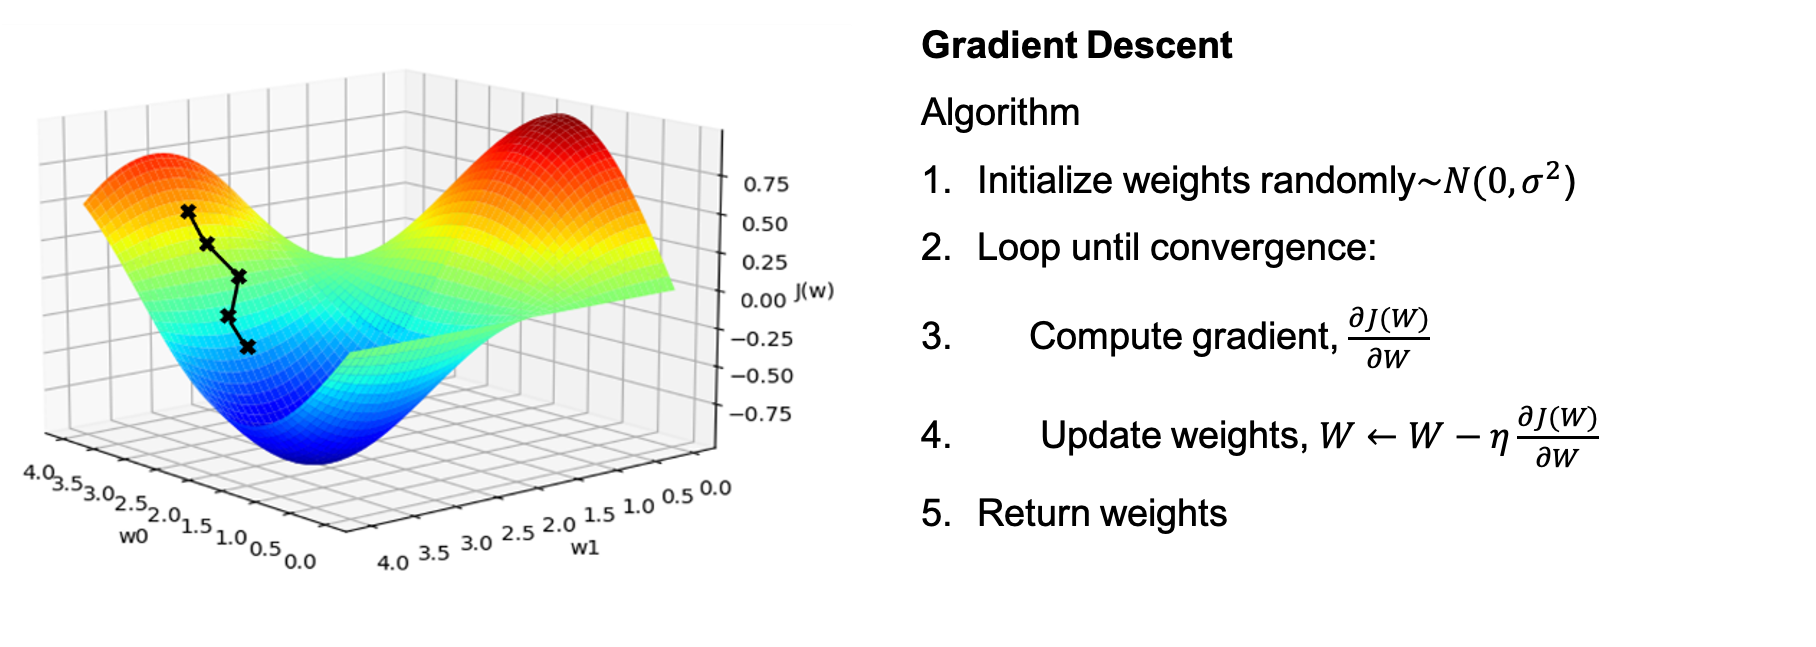

A **metric** is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

In [ ]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) 

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_split=0.2)

In [ ]:
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('MAE loss')
plt.plot(history.history['mae'],'g',label = 'training_loss')
plt.plot(history.history['val_mae'],'b', label = 'validation_loss')
plt.legend()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
prediction = model.predict(X_test)